In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
%matplotlib inline

## 01 - Criando DataFrame

In [2]:
file = "//home//vinicius//Data_Science//Notebooks//Kaggle//DataSets//gas-prices-in-brazil//2004-2019.tsv"

In [3]:
df1 = pd.read_table(file)
df1.drop("Unnamed: 0", axis=1,inplace=True)

In [4]:
df1.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004


#### Dados por semana

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106823 entries, 0 to 106822
Data columns (total 20 columns):
DATA INICIAL                     106823 non-null object
DATA FINAL                       106823 non-null object
REGIÃO                           106823 non-null object
ESTADO                           106823 non-null object
PRODUTO                          106823 non-null object
NÚMERO DE POSTOS PESQUISADOS     106823 non-null int64
UNIDADE DE MEDIDA                106823 non-null object
PREÇO MÉDIO REVENDA              106823 non-null float64
DESVIO PADRÃO REVENDA            106823 non-null float64
PREÇO MÍNIMO REVENDA             106823 non-null float64
PREÇO MÁXIMO REVENDA             106823 non-null float64
MARGEM MÉDIA REVENDA             106823 non-null object
COEF DE VARIAÇÃO REVENDA         106823 non-null float64
PREÇO MÉDIO DISTRIBUIÇÃO         106823 non-null object
DESVIO PADRÃO DISTRIBUIÇÃO       106823 non-null object
PREÇO MÍNIMO DISTRIBUIÇÃO        106823 non-n

## 02 - Trocando nomes das colunas

In [6]:
df1.rename(columns = {
        "DATA INICIAL": "data_inicial",
        "DATA FINAL": "data_final",
        "REGIÃO": "regiao",
        "ESTADO": "estado",
        "PRODUTO": "produto",
        "NÚMERO DE POSTOS PESQUISADOS": "postos_pesquisados",
        "UNIDADE DE MEDIDA": "unidade",
        "PREÇO MÉDIO REVENDA": "preço_medio",
        "DESVIO PADRÃO REVENDA": "preço_dp",
        "PREÇO MÍNIMO REVENDA": "preço_min",
        "PREÇO MÁXIMO REVENDA": "preço_max",
        "MARGEM MÉDIA REVENDA": "margem_media",
        "ANO": "ano",
        "MÊS": "mes",
        "COEF DE VARIAÇÃO DISTRIBUIÇÃO": "coef_dist",
        "PREÇO MÁXIMO DISTRIBUIÇÃO": "dist_preço_max",
        "PREÇO MÍNIMO DISTRIBUIÇÃO": "dist_preço_min",
        "DESVIO PADRÃO DISTRIBUIÇÃO": "dist_dp_preço",
        "PREÇO MÉDIO DISTRIBUIÇÃO": "dist_prelo_medio",
        "COEF DE VARIAÇÃO REVENDA": "coef_variaçao"},inplace=True)

In [7]:
df1.head()

,data_inicial,data_final,regiao,estado,produto,postos_pesquisados,unidade,preço_medio,preço_dp,preço_min,preço_max,margem_media,coef_variaçao,dist_prelo_medio,dist_dp_preço,dist_preço_min,dist_preço_max,coef_dist,mes,ano
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004


## 03 - Criar DataFrames separados para os tipos de PRODUTO
**OLEO DIESEL
OLEO DIESEL S10  
GASOLINA COMUM  
GLP  
ETANOL HIDRATADO  
GNV**


In [8]:
df1['produto'].value_counts()

ÓLEO DIESEL         21194
GASOLINA COMUM      21194
GLP                 21186
ETANOL HIDRATADO    21102
GNV                 13034
ÓLEO DIESEL S10      9113
Name: produto, dtype: int64

### Quantidade do produto pesquisado por regiao

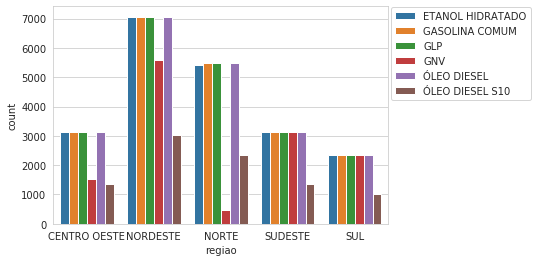

In [9]:
sns.countplot(x='regiao', data=df1, hue='produto')
plt.legend(loc=(1.01,0.57))

**Regiao nordeste foi onde mais houve pesquisa, e os produtos com mesmo numero de pesquisa sempre foram:  
    etanol, gasolina, glp, diesel**

## Analise de Produto por região

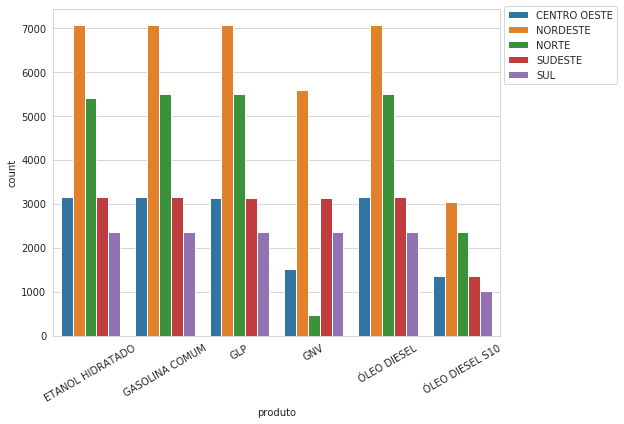

In [10]:
plt.figure(figsize=(8,6))
sns.countplot(x='produto',data=df1,hue='regiao',)
plt.xticks(rotation=30)
plt.legend(loc=(1.01,0.77))

### Analise pela Gasolina, Etanol e Diesel

In [11]:
df_gasolina = df1[df1['produto'].str.lower()=='gasolina comum']
df_etanol = df1[df1['produto'].str.lower()=='etanol hidratado']
df_diesel = df1[df1['produto'].str.lower()=='óleo diesel']

In [12]:
print(df_gasolina['produto'].value_counts(),'\n')
print(df_etanol['produto'].value_counts(),'\n')
print(df_diesel['produto'].value_counts(),'\n')

GASOLINA COMUM    21194
Name: produto, dtype: int64 

ETANOL HIDRATADO    21102
Name: produto, dtype: int64 

ÓLEO DIESEL    21194
Name: produto, dtype: int64 



## 06 - Agrupar por Estado

In [13]:
df_group = df1.groupby("estado")["produto"].value_counts().to_frame("qtd").reset_index()
df_group = df_group.pivot("estado", "produto")
df_group.head()

qtd                                           \
produto  ETANOL HIDRATADO GASOLINA COMUM    GLP    GNV ÓLEO DIESEL   
estado                                                               
ACRE                784.0          785.0  785.0    5.0       785.0   
ALAGOAS             785.0          785.0  784.0  774.0       785.0   
AMAPA               703.0          784.0  784.0   12.0       784.0   
AMAZONAS            785.0          785.0  785.0  412.0       785.0   
BAHIA               785.0          785.0  785.0  785.0       785.0   

                          
produto  ÓLEO DIESEL S10  
estado                    
ACRE               336.0  
ALAGOAS            337.0  
AMAPA              336.0  
AMAZONAS           337.0  
BAHIA              338.0

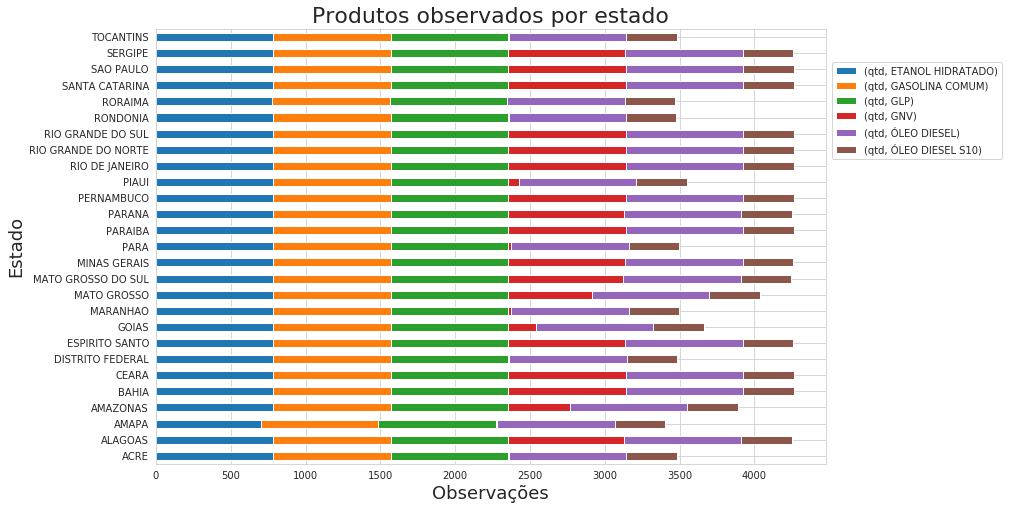

In [14]:
fig, ax = plt.subplots(figsize=(12,8))
df_group.plot(kind="barh", stacked=True, ax=ax)
plt.title("Produtos observados por estado", fontsize=22)
plt.xlabel("Observações", fontsize=18)
plt.ylabel("Estado", fontsize=18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc=(1.01,0.7))

## 05 - Trabalhar sobre o DataFrame df_gasolina

In [15]:
df_gasolina.head()

,data_inicial,data_final,regiao,estado,produto,postos_pesquisados,unidade,preço_medio,preço_dp,preço_min,preço_max,margem_media,coef_variaçao,dist_prelo_medio,dist_dp_preço,dist_preço_min,dist_preço_max,coef_dist,mes,ano
12064,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,GASOLINA COMUM,128,R$/l,2.029,0.007,1.99,2.070,0.318,0.003,1.711,0.02,1.651,1.7427,0.012,5,2004
12065,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,GASOLINA COMUM,395,R$/l,2.025,0.062,1.85,2.220,0.296,0.031,1.729,0.036,1.6643,1.915,0.021,5,2004
12066,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,GASOLINA COMUM,194,R$/l,2.358,0.066,2.00,2.540,0.472,0.028,1.886,0.068,1.75,2.0713,0.036,5,2004
12067,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,GASOLINA COMUM,166,R$/l,2.120,0.075,1.97,2.440,0.325,0.035,1.795,0.033,1.70701,1.9703,0.018,5,2004
12068,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,GASOLINA COMUM,106,R$/l,2.090,0.034,2.00,2.159,0.35,0.016,1.74,0.042,1.6789,1.918,0.024,5,2004


In [16]:
df_gasolina.isnull().sum() ## No NaN values

data_inicial          0
data_final            0
regiao                0
estado                0
produto               0
postos_pesquisados    0
unidade               0
preço_medio           0
preço_dp              0
preço_min             0
preço_max             0
margem_media          0
coef_variaçao         0
dist_prelo_medio      0
dist_dp_preço         0
dist_preço_min        0
dist_preço_max        0
coef_dist             0
mes                   0
ano                   0
dtype: int64

In [17]:
df_gasolina['regiao'].value_counts()

NORDESTE        7065
NORTE           5494
SUDESTE         3140
CENTRO OESTE    3140
SUL             2355
Name: regiao, dtype: int64

In [18]:
gas_group = df_gasolina.groupby(['ano','regiao']).mean()

In [19]:
gas_group

postos_pesquisados  preço_medio  preço_dp  preço_min  \
ano  regiao                                                               
2004 CENTRO OESTE          223.375000     2.288507  0.061257   2.113537   
     NORDESTE              225.143791     2.186523  0.072029   2.000768   
     NORTE                  94.789916     2.351059  0.100534   2.136168   
     SUDESTE              1703.345588     2.126941  0.090971   1.848309   
     SUL                   696.529412     2.217078  0.082480   1.983059   
...                               ...          ...       ...        ...   
2019 CENTRO OESTE          130.410000     4.347360  0.166450   4.037390   
     NORDESTE              128.982222     4.419596  0.162080   4.148582   
     NORTE                  55.040000     4.382480  0.201909   4.109051   
     SUDESTE               690.040000     4.519000  0.168280   4.100090   
     SUL                   326.320000     4.276760  0.170173   3.931147   

                   preço_max  coef_variaçao       mes  
ano  regiao                                            
2004 CENTRO OESTE   2.445801       0.026772  8.529412  
     NORDESTE       2.362608       0.033029  8.529412  
     NORTE          2.627164       0.042101  8.529412  
     SUDESTE        2.450890       0.042934  8.529412  
     SUL            2.507922       0.037206  8.529412  
...                      ...            ...       ...  
2019 CENTRO OESTE   4.829650       0.038430  3.480000  
     NORDESTE       4.858729       0.036969  3.480000  
     NORTE          5.002160       0.046583  3.480000  
     SUDESTE        5.217410       0.037550  3.480000  
     SUL            4.821507       0.039813  3.480000  

[80 rows x 7 columns]

In [20]:
df_gasolina.head()

,data_inicial,data_final,regiao,estado,produto,postos_pesquisados,unidade,preço_medio,preço_dp,preço_min,preço_max,margem_media,coef_variaçao,dist_prelo_medio,dist_dp_preço,dist_preço_min,dist_preço_max,coef_dist,mes,ano
12064,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,GASOLINA COMUM,128,R$/l,2.029,0.007,1.99,2.070,0.318,0.003,1.711,0.02,1.651,1.7427,0.012,5,2004
12065,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,GASOLINA COMUM,395,R$/l,2.025,0.062,1.85,2.220,0.296,0.031,1.729,0.036,1.6643,1.915,0.021,5,2004
12066,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,GASOLINA COMUM,194,R$/l,2.358,0.066,2.00,2.540,0.472,0.028,1.886,0.068,1.75,2.0713,0.036,5,2004
12067,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,GASOLINA COMUM,166,R$/l,2.120,0.075,1.97,2.440,0.325,0.035,1.795,0.033,1.70701,1.9703,0.018,5,2004
12068,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,GASOLINA COMUM,106,R$/l,2.090,0.034,2.00,2.159,0.35,0.016,1.74,0.042,1.6789,1.918,0.024,5,2004


### Preço médio da gasolina por regiao com o tempo

Text(0.5, 1.0, 'Preço Médio Gasolina')

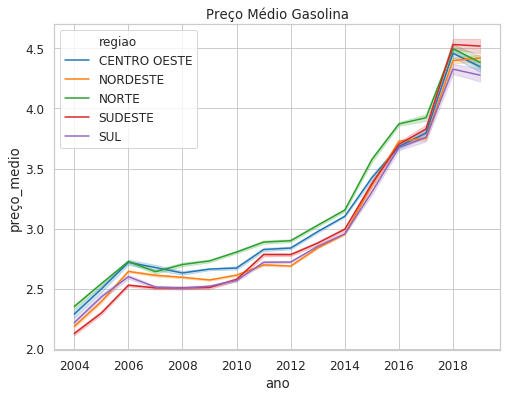

In [119]:
plt.figure(figsize=(8,6))
sns.lineplot(x='ano',y='preço_medio', hue='regiao',data=df_gasolina)
plt.title("Preço Médio Gasolina")